In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
df = pd.read_csv("../1_Data/transformed_loan_approval_dataset.csv")

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,debt_to_income,loan_to_assets,cibil_bucket
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,50700000,3.114583,0.589744,2
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,17000000,2.975609,0.717647,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,57700000,3.263736,0.514731,1
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,52700000,3.743902,0.582543,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,55000000,2.469388,0.440000,0


In [4]:
# Split features and target
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
model_metrics = {}

In [5]:
# Helper function to evaluate and print metrics
def evaluate_model(name, y_true, y_pred):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }
    model_metrics[name] = metrics
    print(f"\nResults for {name}")
    for k, v in metrics.items():
        print(f"{k}: {v:.5f}")

In [6]:
# Logistic Regression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
evaluate_model("Logistic Regression", y_test, y_pred_logreg)


Results for Logistic Regression
Accuracy: 0.90749
Precision: 0.91544
Recall: 0.93785
F1 Score: 0.92651


In [7]:
# Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
evaluate_model("Random Forest", y_test, y_pred_rf)


Results for Random Forest
Accuracy: 0.99883
Precision: 0.99812
Recall: 1.00000
F1 Score: 0.99906


In [8]:
# Support Vector Machine

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
evaluate_model("SVM", y_test, y_pred_svm)


Results for SVM
Accuracy: 0.93911
Precision: 0.93625
Recall: 0.96798
F1 Score: 0.95185


In [18]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
evaluate_model("XGBoost", y_test, y_pred_xgb)


Results for XGBoost
Accuracy: 0.99766
Precision: 0.99812
Recall: 0.99812
F1 Score: 0.99812


/Users/hamzakamran/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


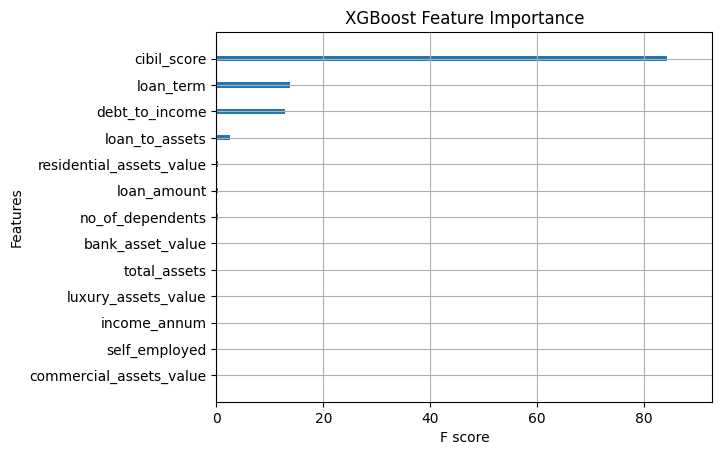

In [21]:
# Display important features used in XGBoost
xgb_model.get_booster().feature_names = X.columns.tolist()
plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title('XGBoost Feature Importance')
plt.show()

Epoch 1/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6773 - loss: 0.5974 - val_accuracy: 0.8668 - val_loss: 0.3534
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.8835 - loss: 0.3156 - val_accuracy: 0.8873 - val_loss: 0.2690
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.9009 - loss: 0.2316 - val_accuracy: 0.8887 - val_loss: 0.2382
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.9046 - loss: 0.2122 - val_accuracy: 0.9004 - val_loss: 0.2208
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9203 - loss: 0.1991 - val_accuracy: 0.9078 - val_loss: 0.2077
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.9288 - loss: 0.1761 - val_accuracy: 0.9195 - val_loss: 0.1936
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9348 - loss: 0.1820 - val_accuracy: 0.9180 - val_loss: 0.1873
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.9338 - loss: 0.1621 - val_accuracy: 0.9195

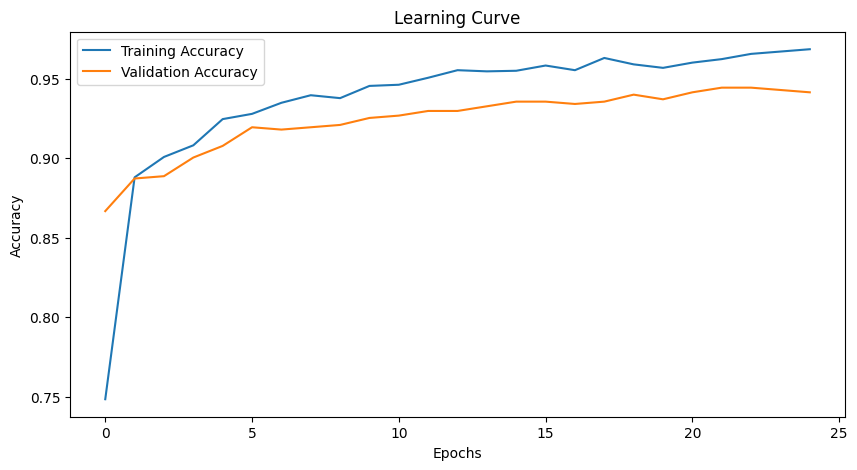

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


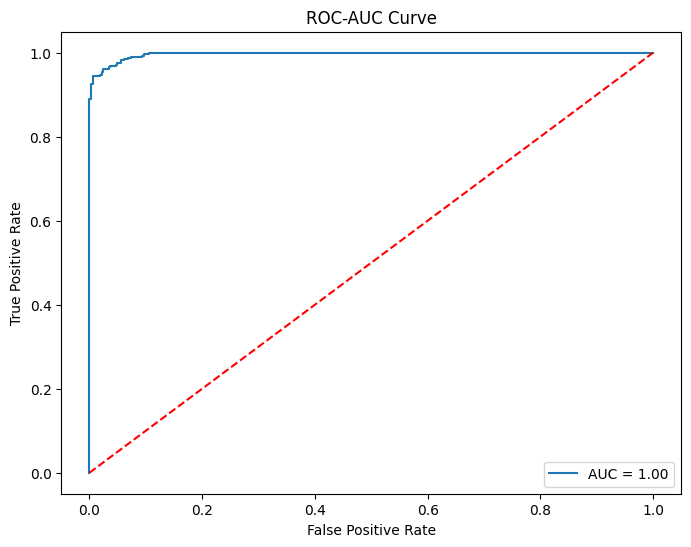

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step

Results for Neural Network
Accuracy: 0.96370
Precision: 0.96992
Recall: 0.97175
F1 Score: 0.97084
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.907494   0.915441  0.937853  0.926512
Random Forest        0.998829   0.998120  1.000000  0.999059
SVM                  0.939110   0.936248  0.967985  0.951852
XGBoost              0.997658   0.998117  0.998117  0.998117
Neural Network       0.963700   0.969925  0.971751  0.970837


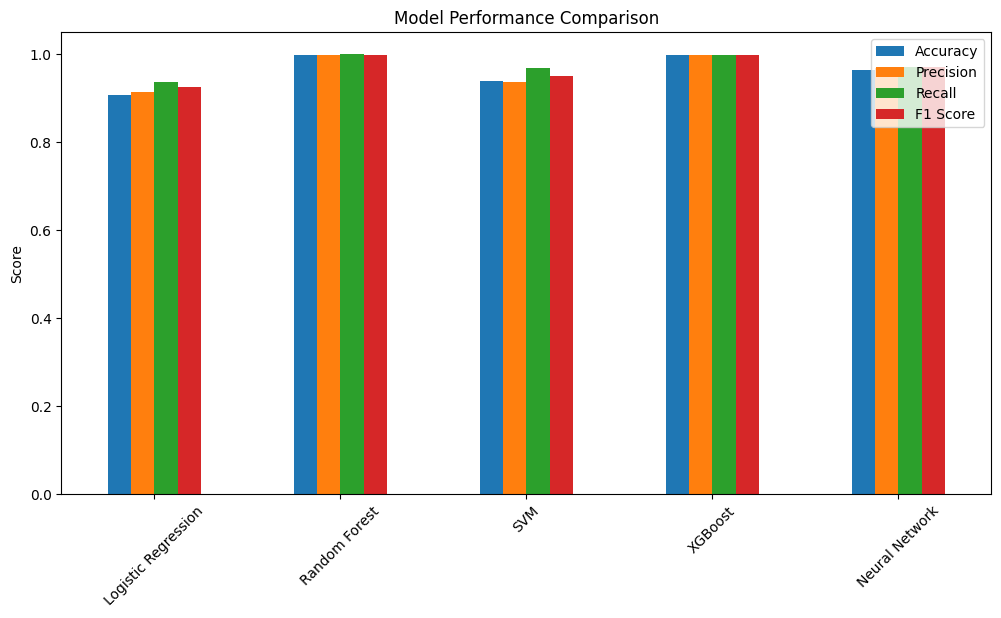

In [22]:
# Feedforward Neural Network

# Define NN architecture
nn = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),  # Input + Hidden Layer 1
    Dropout(0.3),  # Optional: Dropout to reduce overfitting
    Dense(32, activation='relu'),  # Hidden Layer 2
    Dense(1, activation='sigmoid')  # Output Layer for binary classification
])

# Compile the model
nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train Neural Network
history = nn.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

# Plot Learning Curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot AUC Curve for Neural Network
y_pred_prob = nn.predict(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

# Evaluate Neural Network
y_pred_ann = (nn.predict(X_test_scaled) > 0.5).astype("int32").flatten()
evaluate_model("Neural Network", y_test, y_pred_ann)

# Plot All Model Results
results_df = pd.DataFrame(model_metrics).T
print(results_df)

# Plot Model Performance Comparison
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

